In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [71]:
start = '2010-01-01'
end = '2022-12-31'

df = yf.download('AAPL', start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [46]:
df['Volume'] = df['Volume'].astype(float)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [73]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [74]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


<AxesSubplot:>

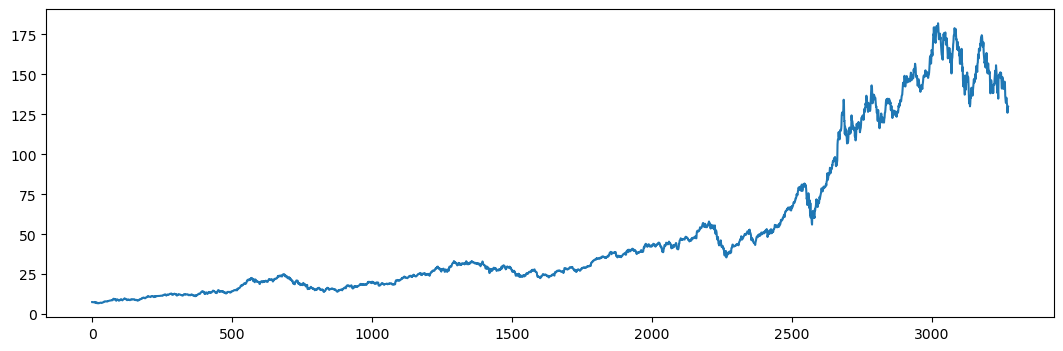

In [75]:
df['Close'].plot(figsize=(13,4))

In [76]:
ma100 = df.rolling(100).mean()       #pd.DataFrame.rolling(data['Close'],ma).mean()
ma100

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3267,150.664401,152.5858,148.5260,150.515600,83462530.0
3268,150.318101,152.2280,148.1689,150.157800,83597867.0
3269,149.982701,151.8798,147.7976,149.764699,83885281.0
3270,149.598901,151.5065,147.4329,149.412100,84039549.0


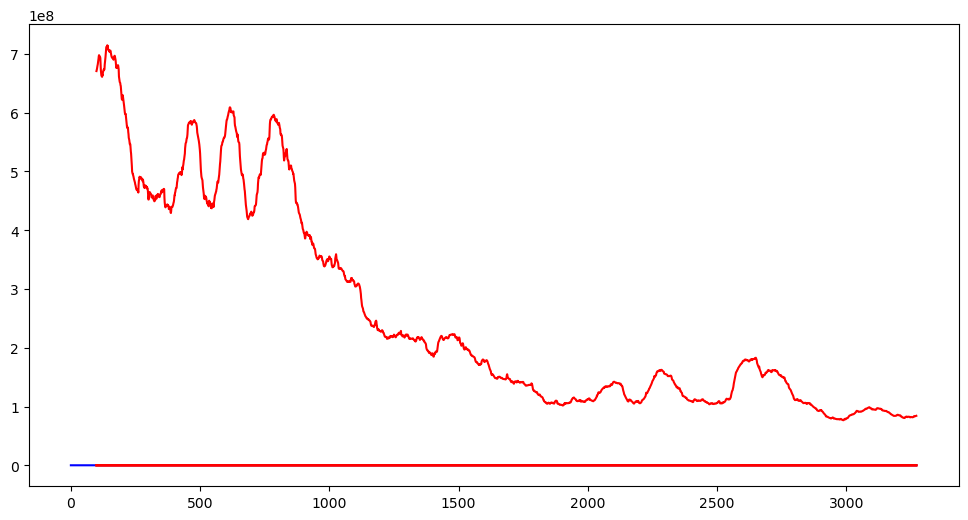

In [81]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')

In [82]:
ma200 = df.rolling(200).mean()       #pd.DataFrame.rolling(data['Close'],ma).mean()
ma200

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3267,152.02510,154.15895,149.98075,152.1331,86371896.5
3268,151.88735,154.01960,149.85185,152.0096,86232085.0
3269,151.77845,153.90415,149.73070,151.8867,86115616.5
3270,151.66390,153.77870,149.61745,151.7593,86029313.5


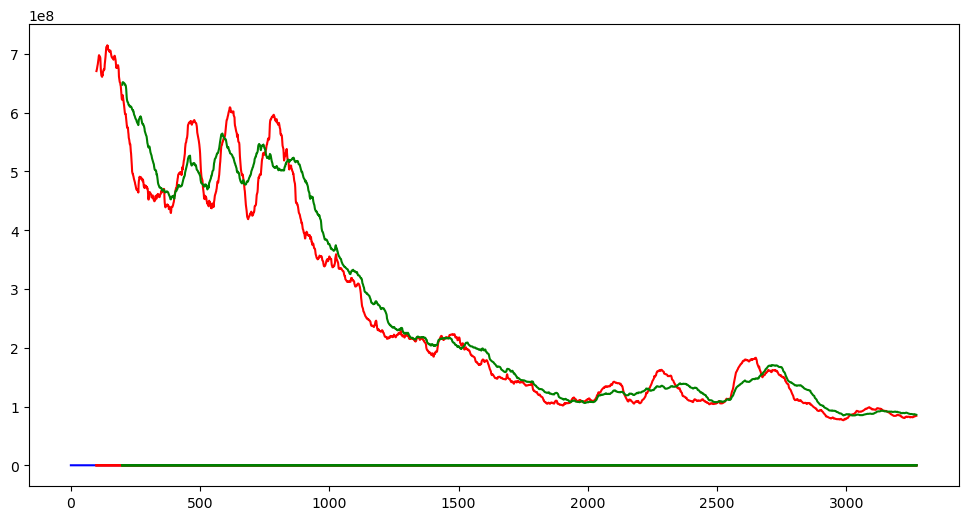

In [83]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [100]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [102]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [103]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2190, 100, 1)
(2190,)


In [104]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [105]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [107]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 50s 394ms/step - loss: 0.0301
Epoch 2/50
69/69 [==============================] - 26s 375ms/step - loss: 0.0067
Epoch 3/50
69/69 [==============================] - 27s 394ms/step - loss: 0.0054
Epoch 4/50
69/69 [==============================] - 32s 461ms/step - loss: 0.0049
Epoch 5/50
69/69 [==============================] - 22s 319ms/step - loss: 0.0050
Epoch 6/50
69/69 [==============================] - 28s 404ms/step - loss: 0.0046
Epoch 7/50
69/69 [==============================] - 31s 450ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 31s 446ms/step - loss: 0.0042
Epoch 9/50
69/69 [==============================] - 29s 417ms/step - loss: 0.0040
Epoch 10/50
69/69 [==============================] - 30s 433ms/step - loss: 0.0039
Epoch 11/50
69/69 [==============================] - 29s 420ms/step - loss: 0.0037
Epoch 12/50
69/69 [==============================] - 28s 408ms/step - loss: 0.0035
Epoch 13/50
6

In [120]:
model.save('keras_model.h5')

In [108]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [109]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [110]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [111]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [113]:
# Making Prediction

y_predicted = model.predict(x_test)

31/31 [==============================] - 3s 92ms/step


In [115]:
y_predicted.shape

(982, 1)

In [116]:
scaler = scaler.scale_

In [117]:
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

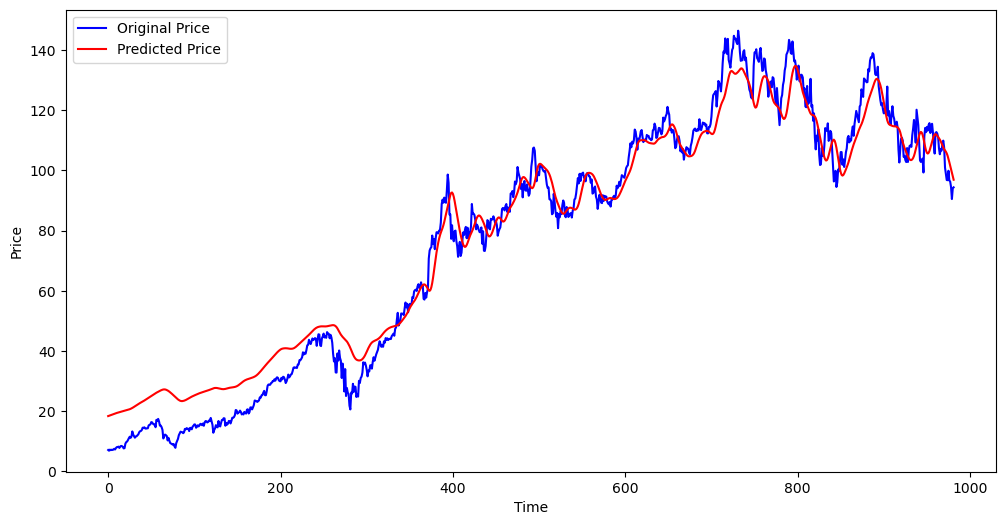

In [118]:
#Final Graph

plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

plt.show()